In [12]:
# keras 环境
from GEmbedding.ge import *
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import csv
import numpy as np
import sklearn.metrics as mt
import datetime
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from random import shuffle
import tensorflow as tf

In [13]:
print(datetime.date.today().strftime("%Y%m%d")[2:])

230406


In [14]:
# 原始邻接矩阵
md = pd.read_csv("/mnt/yzy/NIMCGCN/datasets/data(MDA108)/mirna_drug_1043_2166.txt",sep = ',', header = 0, index_col = 0)
(r,c) = md.shape
print(r,c)

drug_node = md.columns.to_list()        # drug节点列表
rna_node = md.index.to_list()           # rna节点列表
# print(drug_node[:10],'\n',rna_node[:10],sep='')

print(len(drug_node),":",drug_node)
print(len(rna_node),":",rna_node)
print(md.shape)
rr = int(r / 10)    # 行10等分
cc = int(c / 10)    # 列10等分

1043 2166
2166 : ['15', '119', '137', '176', '187', '190', '241', '243', '244', '247', '280', '281', '305', '311', '338', '444', '460', '544', '564', '586', '598', '612', '679', '681', '702', '712', '727', '750', '753', '757', '774', '784', '785', '807', '896', '936', '938', '946', '947', '948', '977', '978', '985', '988', '996', '999', '1004', '1023', '1030', '1031', '1032', '1046', '1051', '1054', '1060', '1089', '1091', '1110', '1123', '1130', '1175', '1176', '1207', '1674', '1676', '1727', '1775', '1832', '1923', '1935', '1978', '1981', '1983', '1986', '1989', '1990', '1993', '2082', '2083', '2088', '2092', '2099', '2118', '2123', '2130', '2131', '2132', '2140', '2141', '2145', '2148', '2153', '2157', '2159', '2160', '2161', '2162', '2164', '2165', '2170', '2179', '2187', '2194', '2197', '2200', '2202', '2206', '2216', '2236', '2244', '2247', '2249', '2265', '2266', '2267', '2284', '2315', '2327', '2335', '2336', '2337', '2343', '2345', '2350', '2351', '2353', '2365', '2366', '2368

In [15]:
# 标签信息
ground_truth = pd.read_csv("/mnt/yzy/NIMCGCN/datasets/data(MDA108)/m-d.csv",delimiter=',',header=None)
ground_truth = ground_truth.values
y_true = ground_truth.reshape(-1)
print(ground_truth.shape)

(1043, 2166)


In [16]:
# 加载所有的边信息
all_edge = []
with open("/mnt/yzy/NIMCGCN/datasets/data(MDA108)/mirna_drug_entry_1043_2166.txt", 'r', encoding = 'utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        all_edge.append(row)

print(all_edge)
print(len(all_edge))

[['hsa-let-7a', '21633059'], ['hsa-let-7a', '46843772'], ['hsa-let-7a', '444732'], ['hsa-let-7a', '5757'], ['hsa-let-7a', '36462'], ['hsa-let-7a', '162282'], ['hsa-let-7a', '712'], ['hsa-let-7a', '3229'], ['hsa-let-7a', '4091'], ['hsa-let-7a', '3385'], ['hsa-let-7a', '969516'], ['hsa-let-7a', '5280795'], ['hsa-let-7a', '3652'], ['hsa-let-7a', '5865'], ['hsa-let-7a-1', '60750'], ['hsa-let-7a-3', '444795'], ['hsa-let-7b', '60750'], ['hsa-let-7b', '3229'], ['hsa-let-7b', '5757'], ['hsa-let-7b', '36462'], ['hsa-let-7b', '229455'], ['hsa-let-7b', '5310940'], ['hsa-let-7b', '712'], ['hsa-let-7b', '4091'], ['hsa-let-7b', '3385'], ['hsa-let-7c', '60750'], ['hsa-let-7c', '444795'], ['hsa-let-7c', '444732'], ['hsa-let-7c', '5757'], ['hsa-let-7c', '229455'], ['hsa-let-7c', '712'], ['hsa-let-7c', '119307'], ['hsa-let-7c', '4091'], ['hsa-let-7c', '6623'], ['hsa-let-7d', '241'], ['hsa-let-7d', '60750'], ['hsa-let-7d', '444795'], ['hsa-let-7d', '5757'], ['hsa-let-7d', '446220'], ['hsa-let-7d', '712']

In [17]:
# shuffle(all_edge)
print(all_edge)
print(len(all_edge))

[['hsa-let-7a', '21633059'], ['hsa-let-7a', '46843772'], ['hsa-let-7a', '444732'], ['hsa-let-7a', '5757'], ['hsa-let-7a', '36462'], ['hsa-let-7a', '162282'], ['hsa-let-7a', '712'], ['hsa-let-7a', '3229'], ['hsa-let-7a', '4091'], ['hsa-let-7a', '3385'], ['hsa-let-7a', '969516'], ['hsa-let-7a', '5280795'], ['hsa-let-7a', '3652'], ['hsa-let-7a', '5865'], ['hsa-let-7a-1', '60750'], ['hsa-let-7a-3', '444795'], ['hsa-let-7b', '60750'], ['hsa-let-7b', '3229'], ['hsa-let-7b', '5757'], ['hsa-let-7b', '36462'], ['hsa-let-7b', '229455'], ['hsa-let-7b', '5310940'], ['hsa-let-7b', '712'], ['hsa-let-7b', '4091'], ['hsa-let-7b', '3385'], ['hsa-let-7c', '60750'], ['hsa-let-7c', '444795'], ['hsa-let-7c', '444732'], ['hsa-let-7c', '5757'], ['hsa-let-7c', '229455'], ['hsa-let-7c', '712'], ['hsa-let-7c', '119307'], ['hsa-let-7c', '4091'], ['hsa-let-7c', '6623'], ['hsa-let-7d', '241'], ['hsa-let-7d', '60750'], ['hsa-let-7d', '444795'], ['hsa-let-7d', '5757'], ['hsa-let-7d', '446220'], ['hsa-let-7d', '712']

In [18]:
K = 10              # K-fold交叉验证

Gr = nx.Graph()     # 包含所有rna节点和相邻drug节点的子图
Gd = nx.Graph()     # 包含所有drug节点和相邻rna节点的子图

for rna in rna_node:
    Gr.add_node(rna)

for drug in drug_node:
    Gd.add_node(drug)

### 对比多种图表示学习方法提取图结构特征 直接从边元素抽样

In [19]:
K = 10              # K-fold交叉验证
# methodList = [DeepWalk, LINE, Node2Vec, SDNE, Struc2Vec]    # 待筛选方法
methodList = [DeepWalk, LINE, Node2Vec, Struc2Vec ]
# methodList = [DeepWalk]


Gr = nx.Graph()     # 包含所有rna节点和相邻drug节点的子图
Gd = nx.Graph()     # 包含所有drug节点和相邻rna节点的子图

for rna in rna_node:
    Gr.add_node(rna)

for drug in drug_node:
    Gd.add_node(drug)
    

In [20]:
file = open("log.txt",'w+')

for method in methodList:

    print("-"*20+str(method)+"-"*20)
    prediction = np.empty([1043,2166,K])
    
    for i in range(0,K):
        print("*"*15+"第{}次交叉验证".format(i+1)+"*"*15)

        Gr.remove_edges_from(list(Gr.edges))
        Gd.remove_edges_from(list(Gd.edges))
        
        # print("Gr节点数:", Gr.number_of_nodes(), " Gd节点数:", Gd.number_of_nodes())
        if Gr.number_of_edges() == 0 and Gd.number_of_edges() == 0:
            # print("Gr Gd 边信息清零成功!")
            pass
        else:
            # print("Gr Gd 边信息清零错误!")
            break
        
        cv_edge = all_edge[0:i*143] + all_edge[(i+1)*143:]
        
        for (na, nb) in cv_edge:
            Gr.add_node(nb)
            Gr.add_edge(na, nb)
            
            Gd.add_node(na)
            Gd.add_edge(na, nb)
        
        # print("Gr 节点数:{} 边数:{}".format(Gr.number_of_nodes(), Gr.number_of_edges()))

        # 获取整张子图嵌入

        if method in [DeepWalk, Node2Vec, Struc2Vec]:
            if method == DeepWalk:
                modelR = method(Gr, walk_length=10, num_walks=80, workers=1)
                modelD = method(Gd, walk_length=10, num_walks=80, workers=1)
            elif method == Node2Vec:
                modelR = method(Gr, walk_length = 10, num_walks = 80, p = 0.25, q = 4, workers = 1)
                modelD = method(Gd, walk_length = 10, num_walks = 80, p = 0.25, q = 4, workers = 1)
            elif method == Struc2Vec:
                modelR = method(Gr, walk_length=10, num_walks=80, workers=1, verbose=0)
                modelD = method(Gd, walk_length=10, num_walks=80, workers=1, verbose=0)
            
            modelR.train(window_size=5, iter=3)
            modelD.train(window_size=5, iter=3)
        
        elif method == LINE:
            modelR = LINE(Gr,embedding_size=128, order='second')
            modelD = LINE(Gd,embedding_size=128, order='second')

            modelR.train(batch_size=1024, epochs=80, verbose=2)
            modelD.train(batch_size=1024, epochs=80, verbose=2)

        elif method == SDNE:
            modelR = SDNE(Gr, hidden_size=[256,128])
            modelD = SDNE(Gd, hidden_size=[256,128])
            
            modelR.train(batch_size=1024, epochs=80, verbose=2)
            modelD.train(batch_size=1024, epochs=80, verbose=2)

        gr_embeddings = modelR.get_embeddings()  
        gd_embeddings = modelD.get_embeddings()

        # 分别提取所有rna节点和drug节点的嵌入
        rna_embeddings = [] 
        for rna in rna_node:
            rna_embeddings.append(gr_embeddings[rna])
        rna_embeddings = np.array(rna_embeddings)

        drug_embeddings = []
        for drug in drug_node:
            drug_embeddings.append(gd_embeddings[drug])
        drug_embeddings = np.array(drug_embeddings)
        # print("rna_embedding:",rna_embeddings.shape," drug_embedding:",drug_embeddings.shape)

        t_prediction =  rna_embeddings @ drug_embeddings.T
        # print("生成预测矩阵:{}".format(t_prediction.shape))
        prediction[:,:,i] = t_prediction
        # if i+1 == K:
        #     prediction = np.concatenate((prediction, t_prediction[i*rr:]), axis = 0)
        # else:
        #     prediction = np.concatenate((prediction, t_prediction[i*rr:(i+1)*rr]), axis = 0)

        # print("目前预测矩阵:{}".format(prediction.shape))

    prediction = prediction.mean(axis = 2)
    if method == SDNE:
        np.save("/mnt/yzy/NIMCGCN/Prediction/embedding/{}_10foldCV_{}_elem".format(str(method).split(".")[-1][:-2],datetime.date.today().strftime("%Y%m%d")[2:]), tf.Session().run(prediction) )
    else:
        np.save("/mnt/yzy/NIMCGCN/Prediction/embedding/{}_10foldCV_{}_elem".format(str(method).split(".")[-1][:-2],datetime.date.today().strftime("%Y%m%d")[2:]), prediction)    
    y_pred = prediction.reshape(-1)
    # print(y_true.shape, y_pred.shape)
    print('AUC:',mt.roc_auc_score(y_true, y_pred))
    file.write("{} 10fold CV AUC: {}\n".format(str(method).split(".")[-1][:-2], mt.roc_auc_score(y_true, y_pred)))

file.close()

--------------------<class 'GEmbedding.ge.models.deepwalk.DeepWalk'>--------------------
***************第1次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第2次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第3次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第4次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第5次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第6次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第7次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第8次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第9次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第10次交叉验证***************


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
AUC: 0.9922109471229199
--------------------<class 'GEmbedding.ge.models.line.LINE'>--------------------
***************第1次交叉验证***************


2023-04-06 16:58:04.678556: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-04-06 16:58:04.725104: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:af:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2023-04-06 16:58:04.725910: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 1 with properties: 
pciBusID: 0000:d8:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.582GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2023-04-06 16:58:04.740020: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-04-06 16:58:05.218604: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
8/8 - 0s - loss: 0.6932
Epoch 2/80
8/8 - 0s - loss: 0.6922
Epoch 3/80
8/8 - 0s - loss: 0.6924
Epoch 4/80
8/8 - 0s - loss: 0.6913
Epoch 5/80
8/8 - 0s - loss: 0.6902
Epoch 6/80
8/8 - 0s - loss: 0.6902
Epoch 7/80
8/8 - 0s - loss: 0.6877
Epoch 8/80
8/8 - 0s - loss: 0.6842
Epoch 9/80
8/8 - 0s - loss: 0.6833
Epoch 10/80
8/8 - 0s - loss: 0.6764
Epoch 11/80
8/8 - 0s - loss: 0.6669
Epoch 12/80
8/8 - 0s - loss: 0.6619
Epoch 13/80
8/8 - 0s - loss: 0.6461
Epoch 14/80
8/8 - 0s - loss: 0.6228
Epoch 15/80
8/8 - 0s - loss: 0.6095
Epoch 16/80
8/8 - 0s - loss: 0.5792
Epoch 17/80
8/8 - 0s - loss: 0.5425
Epoch 18/80
8/8 - 0s - loss: 0.5154
Epoch 19/80
8/8 - 0s - loss: 0.4747
Epoch 20/80
8/8 - 0s - loss: 0.4229
Epoch 21/80
8/8 - 0s - loss: 0.3933
Epoch 22/80
8/8 - 0s - loss: 0.3526
Epoch 23/80
8/8 - 0s - loss: 0.3040
Epoch 24/80
8/8 - 0s - loss: 0.2723
Epoch 25/80
8/8 - 0s - loss: 0.2432
Epoch 26/80
8/8 - 0s - loss: 0.20

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第2次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第3次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第4次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第5次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第6次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第7次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第8次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第9次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
***************第10次交叉验证***************
Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


Preprocess transition probs...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


Learning embedding vectors...
Learning embedding vectors done!
Learning embedding vectors...
Learning embedding vectors done!
AUC: 0.9895182531238657
--------------------<class 'GEmbedding.ge.models.struc2vec.Struc2Vec'>--------------------
***************第1次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第2次交叉验证***************


/mnt/yzy/NIMCGCN/GEmbedding/ge/models/struc2vec.py:301: RuntimeWarning: invalid value encountered in double_scalars
  e_list = [x / sum_w for x in e_list]


Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第3次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第4次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第5次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第6次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第7次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Learning representation done!
***************第8次交叉验证***************
Learning representation...
Learning representation done!
Learning representation...
Lear

### 结果分析(SDNE运行报错)

In [28]:
# y_preds = [
#     np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/DeepWalk_10foldCV_230406_elem.npy").reshape(-1),
#     np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/LINE_10foldCV_230406_elem.npy").reshape(-1),
#     np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/Node2Vec_10foldCV_230406_elem.npy").reshape(-1),
#     np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/Struc2Vec_10foldCV_230406_elem.npy").reshape(-1)
# ]

y_preds = [
    np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/DeepWalk_10foldCV_230406_elem.npy"),
    np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/LINE_10foldCV_230406_elem.npy"),
    np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/Node2Vec_10foldCV_230406_elem.npy"),
    np.load("/mnt/yzy/NIMCGCN/Prediction/embedding/Struc2Vec_10foldCV_230406_elem.npy")
]

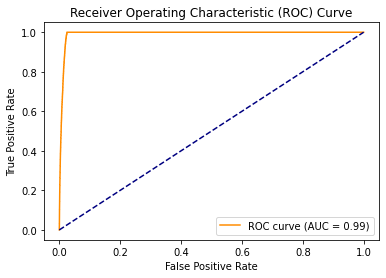

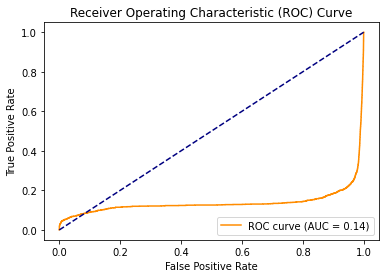

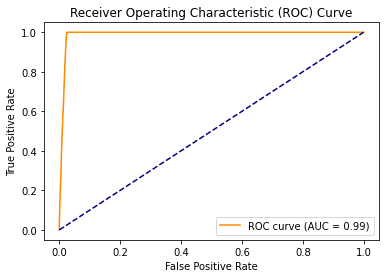

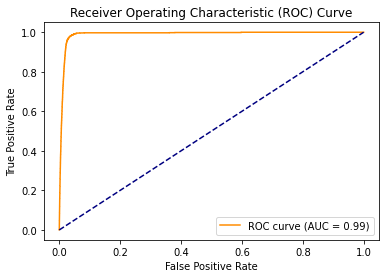

In [32]:
for y_pred in y_preds:
    y_pred = y_pred.mean(axis=2).reshape(-1)
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    # 计算 AUC
    roc_auc = auc(fpr, tpr)

    # 绘制 ROC 曲线
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
# y_pred

array([-4.32971693e-03, -8.50831305e-05,  1.05130946e-05, ...,
       -2.17044704e-05, -1.30841175e-05,  1.69723057e-05])